In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Prerequisite

In [3]:
pip install git+https://github.com/amazon-science/chronos-forecasting.git

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-imvq34e_
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-imvq34e_
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit afd9cfd062b60ca1ba8d7c9daef7dc820489db0a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 4.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl 

## Test script

In [4]:
import pandas as pd
import torch
from chronos import ChronosPipeline
import matplotlib.pyplot as plt
import numpy as np

def predict_and_plot_crypto_data(
    coin_name,
    crypto_data_dict,
    model_name="amazon/chronos-t5-small",
    prediction_length=12,
    num_samples=20):

  """
  Predicts and plots cryptocurrency data for multiple coins.

  Args:
      crypto_data_dict: Dictionary containing data for each cryptocurrency.
          Keys should be coin names (e.g., 'BTC', 'ETH'), values should be file paths to CSV data.
      model_name: Name of the pre-trained Chronos model (default: "amazon/chronos-t5-small").
      prediction_length: Number of future data points to predict (default: 12).
      num_samples: Number of prediction samples to generate (default: 20).
  """

  # Check if coin exists in data
  if coin_name not in crypto_data_dict:
      raise ValueError(f"Coin '{coin_name}' not found in data dictionary.")


  # Initialize Chronos pipeline once outside the loop for efficiency
  pipeline = ChronosPipeline.from_pretrained(
      model_name,
      device_map="cpu",  # use "cpu" for CPU inference and "mps" for Apple Silicon
      torch_dtype=torch.bfloat16,
  )

  predictions = {}  # Create an empty dictionary to store results

  for coin_name, csv_file in crypto_data_dict.items():
    # Load data for the specific coin
    csv_file = crypto_data_dict[coin_name]
    df = pd.read_csv(csv_file)


    # Perform prediction
    forecast = pipeline.predict(
        context=torch.tensor(df["Close"]),
        prediction_length=prediction_length,
        num_samples=num_samples,
    )

    # Generate forecast index for plotting
    forecast_index = range(len(df), len(df) + prediction_length)
    low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

    predictions[coin_name] = {  # Add results to the dictionary
          "median": median,
          "low": low,
          "high": high
      }


    # Plot and visualize predictions (replace with your desired plotting logic)
    plt.plot(df["Close"], label="Actual")
    plt.plot(forecast_index, median, label="Median Prediction")
    plt.fill_between(forecast_index, low, high, alpha=0.2, label="Prediction Range")
    plt.title(f"Predicted {coin_name} Prices")
    plt.legend()
    plt.show()

  return predictions  # Return the dictionary containing predictions

# Example usage
crypto_data = {
  'BTC' : "/content/drive/MyDrive/backtesting/datas/yfinance/BTC-USD.csv",
  'BNB' : "/content/drive/MyDrive/backtesting/datas/yfinance/BNB-USD.csv",
  'ETH' : "/content/drive/MyDrive/backtesting/datas/yfinance/ETH-USD.csv"
}




/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/185M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

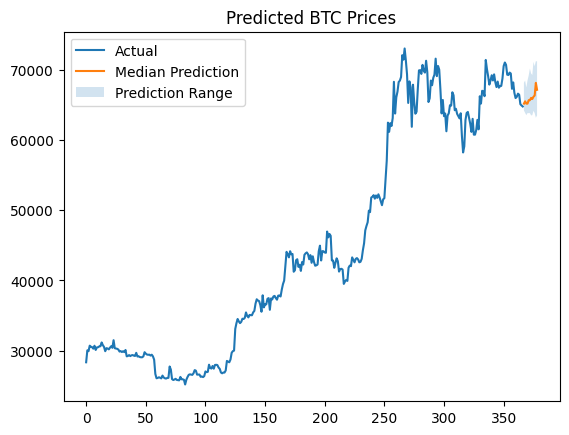

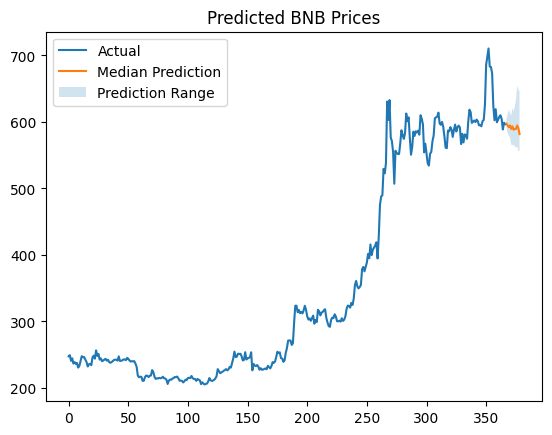

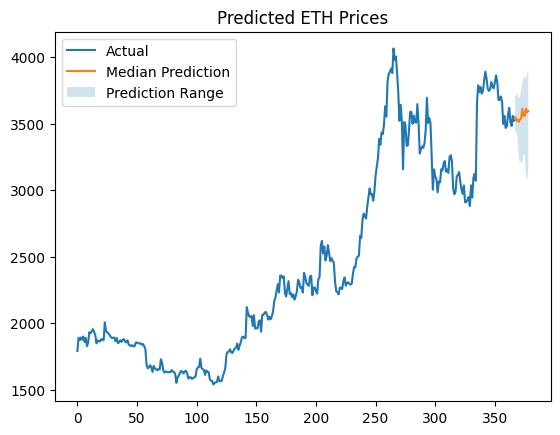

{'BTC': {'median': array([65216.10184736, 65545.47577453, 65216.10184736, 65216.10184736,
         65710.16273811, 65710.16273811, 66039.53666528, 65874.8497017 ,
         66204.22362887, 66368.91059245, 68180.46719188, 67192.34541037]),
  'low': array([64227.98006586, 63898.60078302, 63569.22685585, 63865.6633903 ,
         63865.6633903 , 63865.6633903 , 63536.28946313, 63569.22685585,
         64195.04213757, 63865.6633903 , 63206.91553596, 63536.28946313]),
  'high': array([68213.40458459, 68509.84111904, 67521.71933754, 68509.84111904,
         69234.46429438, 70222.59089599, 69530.90082883, 69300.33907981,
         71177.77528478, 70551.96482316, 71276.58746293, 71243.65007021])},
 'BNB': {'median': array([597.32778443, 594.73070968, 592.1335927 , 594.73070968,
         589.53651795, 593.43215119, 588.23798057, 589.53651795,
         589.53651795, 594.73068857, 590.83505532, 581.74529369]),
  'low': array([591.61417775, 583.30353854, 578.88851146, 576.55114418,
         565.90313

In [5]:
predict_and_plot_crypto_data('BTC', crypto_data)

#crypto_predictions = predict_and_plot_crypto_data(crypto_data)
# Access predictions for a specific coin (e.g., 'BTC')
#btc_predictions = crypto_predictions['BTC']



In [6]:
# Print the median predicted values for all coins
#for coin, prediction in crypto_predictions.items():
#  print(f"Coin: {coin}, Median Prediction: {prediction['median']}")

In [7]:
import pandas as pd
import torch
from chronos import ChronosPipeline
import matplotlib.pyplot as plt
import numpy as np


# Define the crypto coins data source dictionary
crypto_data_dict = {
    'BTC': "/content/drive/MyDrive/backtesting/datas/yfinance/BTC-USD.csv",
    'BNB': "/content/drive/MyDrive/backtesting/datas/yfinance/BNB-USD.csv",
    'ETH': "/content/drive/MyDrive/backtesting/datas/yfinance/ETH-USD.csv"
}

def predict_and_plot_crypto_data(
    coin_name,
    crypto_data_dict,
    model_name="amazon/chronos-t5-small",
    prediction_length=12,
    num_samples=20):
  """
  Predicts and plots cryptocurrency data for a single coin.

  Args:
      coin_name: Name of the cryptocurrency (e.g., 'BTC', 'ETH').
      crypto_data_dict: Dictionary containing data for each cryptocurrency.
          Keys should be coin names, values should be file paths to CSV data.
      model_name: Name of the pre-trained Chronos model (default: "amazon/chronos-t5-small").
      prediction_length: Number of future data points to predict (default: 12).
      num_samples: Number of prediction samples to generate (default: 20).
  """



  # Check if coin exists in data
  if coin_name not in crypto_data_dict:
      raise ValueError(f"Coin '{coin_name}' not found in data dictionary.")

  # Load data for the specified coin
  csv_file = crypto_data_dict[coin_name]
  df = pd.read_csv(csv_file)

  # Initialize Chronos pipeline (can be inside or outside depending on preference)
  pipeline = ChronosPipeline.from_pretrained(
      model_name,
      device_map="cpu",  # use "cpu" for CPU inference and "mps" for Apple Silicon
      torch_dtype=torch.bfloat16,
  )

  # Perform prediction
  forecast = pipeline.predict(
      context=torch.tensor(df["Close"]),
      prediction_length=prediction_length,
      num_samples=num_samples,
  )

  # Generate forecast index for plotting
  forecast_index = range(len(df), len(df) + prediction_length)
  low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

  # Plot and visualize predictions (replace with your desired plotting logic)
  plt.plot(df["Close"], label="Actual")
  plt.plot(forecast_index, median, label="Median Prediction")
  plt.fill_between(forecast_index, low, high, alpha=0.2, label="Prediction Range")
  plt.title(f"Predicted {coin_name} Prices")
  plt.legend()
  plt.show()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


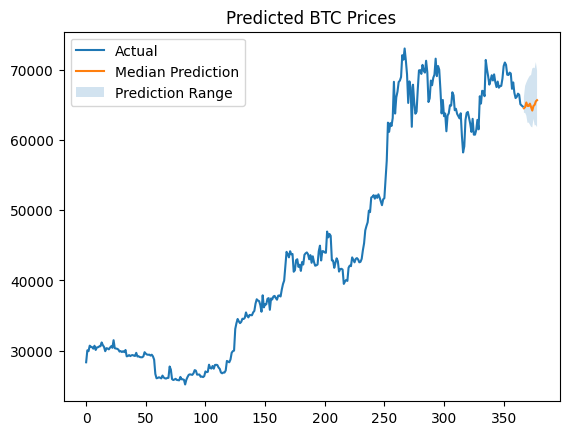

In [8]:
# Example usage (assuming crypto_data_dict is defined)
predict_and_plot_crypto_data('BTC', crypto_data_dict)  # Call for Bitcoin

## Final script

In [9]:
import pandas as pd
import torch
from chronos import ChronosPipeline
import matplotlib.pyplot as plt
import numpy as np


# Define the crypto coins data source dictionary
crypto_data_dict = {
    'BTC': "/content/drive/MyDrive/backtesting/datas/yfinance/BTC-USD.csv",
    'BNB': "/content/drive/MyDrive/backtesting/datas/yfinance/BNB-USD.csv",
    'ETH': "/content/drive/MyDrive/backtesting/datas/yfinance/ETH-USD.csv"
}

def predict_and_plot_crypto_data(
    coin_name,
    crypto_data_dict,
    model_name="amazon/chronos-t5-small",
    prediction_length=12,
    num_samples=20):
    """
    Predicts and plots cryptocurrency data for a single coin.

    Args:
        coin_name (str): Name of the cryptocurrency (e.g., 'BTC', 'ETH').
        crypto_data_dict (dict): Dictionary containing data for each cryptocurrency.
            Keys should be coin names, values should be file paths to CSV data.
        model_name (str): Name of the pre-trained Chronos model (default: "amazon/chronos-t5-small").
        prediction_length (int): Number of future data points to predict (default: 12).
        num_samples (int): Number of prediction samples to generate (default: 20).

    Raises:
        ValueError: If coin_name is not found in crypto_data_dict.

    Returns:
        tuple: Tuple containing forecast index and median prediction array.
    """

    # Check if coin exists in data
    if coin_name not in crypto_data_dict:
        raise ValueError(f"Coin '{coin_name}' not found in data dictionary.")

    # Load data for the specified coin
    csv_file = crypto_data_dict[coin_name]
    df = pd.read_csv(csv_file)

    # Initialize Chronos pipeline
    pipeline = ChronosPipeline.from_pretrained(
        model_name,
        device_map="cpu",  # use "cpu" for CPU inference and "mps" for Apple Silicon
        torch_dtype=torch.bfloat16,
    )

    # Perform prediction
    forecast = pipeline.predict(
        context=torch.tensor(df["Close"]),
        prediction_length=prediction_length,
        num_samples=num_samples,
    )

    # Generate forecast index for plotting
    forecast_index = range(len(df), len(df) + prediction_length)
    low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

    # Plot and visualize predictions
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(df["Close"], label="History")
    plt.plot(forecast_index, median, label="Median Prediction")
    plt.fill_between(forecast_index, low, high, alpha=0.2, label="Prediction Range")
    plt.title(f"Predicted {coin_name} Prices")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)  # Add gridlines
    plt.show()

    return forecast_index, median  # Optionally return forecast data for further use


### Calling the prediction function

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


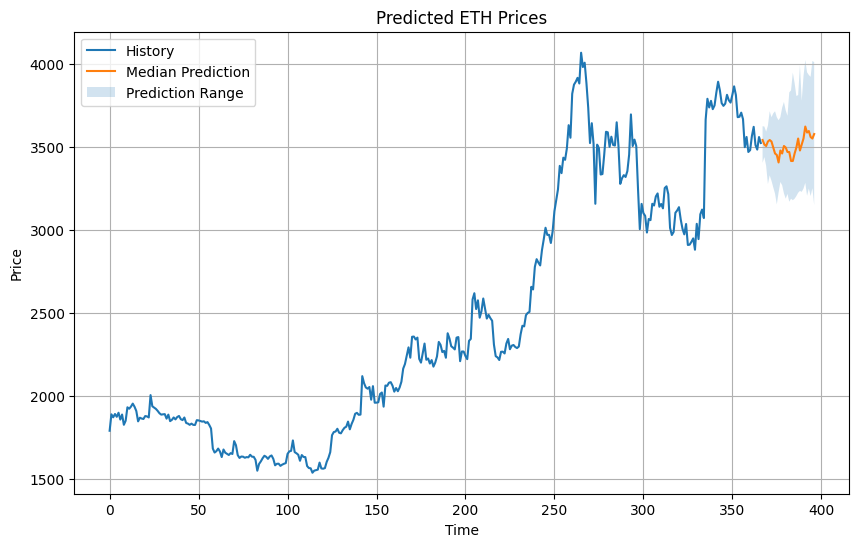

(range(367, 397),
 array([3541.27739117, 3514.24476617, 3505.23374465, 3532.26651617,
        3541.27739117, 3532.26651617, 3496.22272314, 3460.17922314,
        3451.16834814, 3406.11397314, 3478.20097314, 3460.17922314,
        3505.23374465, 3496.22286966, 3469.19009814, 3469.19009814,
        3415.12484814, 3415.12484814, 3460.17922314, 3496.22272314,
        3550.28811965, 3478.20111966, 3514.24461965, 3550.28826617,
        3622.37526616, 3586.33176617, 3595.34264117, 3559.29914117,
        3550.28826617, 3577.32089117]))

In [10]:
predict_and_plot_crypto_data('ETH',crypto_data_dict, prediction_length=30)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


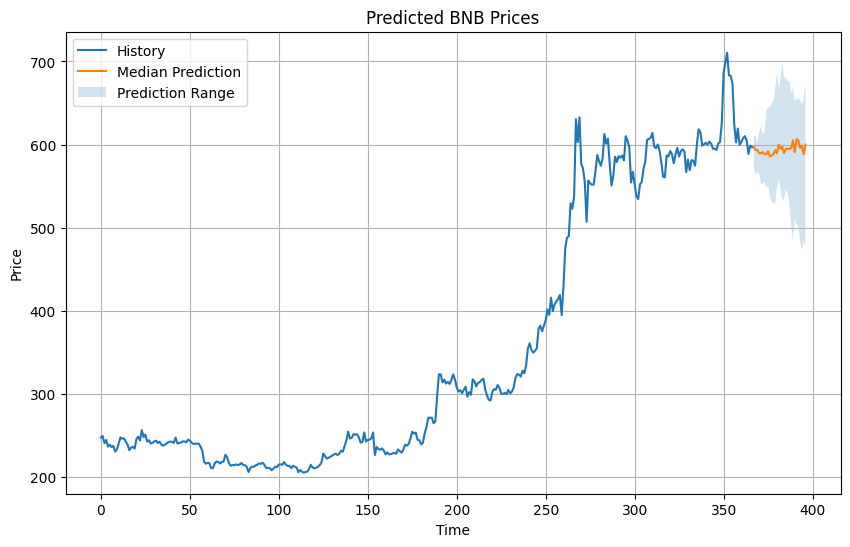

(range(367, 397),
 array([597.32778443, 593.43215119, 593.43215119, 589.53651795,
        589.53651795, 590.83507644, 588.23798057, 588.23798057,
        592.13361381, 585.64090582, 586.93944319, 588.23798057,
        593.43215119, 589.53651795, 599.92485919, 594.73068857,
        597.32778443, 589.53651795, 594.73070968, 594.73068857,
        594.73068857, 596.02922594, 605.11900869, 590.83505532,
        606.41754607, 605.11900869, 596.02924706, 598.6263007 ,
        588.23798057, 599.92485919]))

In [11]:
predict_and_plot_crypto_data('BNB',crypto_data_dict, prediction_length=30)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


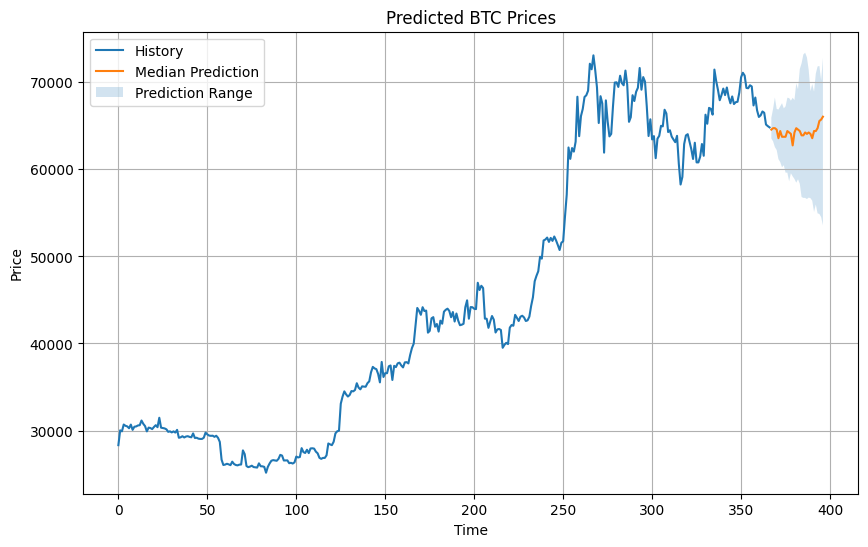

(range(367, 397),
 array([64557.35399303, 64722.04095661, 64722.04095661, 64557.35399303,
        63569.22685585, 64392.66702944, 63733.91649727, 63733.91649727,
        63733.91381943, 64392.66702944, 64227.97738802, 64063.29042444,
        62745.79203793, 64227.97738802, 64722.04095661, 64557.35131519,
        64392.66435161, 63898.60078302, 63898.60078302, 64227.98006586,
        64063.29042444, 64227.97738802, 64063.29042444, 63569.22953369,
        64392.66702944, 64392.66702944, 64722.04095661, 65545.47577453,
        65710.16273811, 66039.53666528]))

In [12]:
predict_and_plot_crypto_data('BTC',crypto_data_dict, prediction_length=30)

## Testing the accuracy

In [53]:
# Define the crypto coins data source dictionary
crypto_data_dict = {
    'BTC': "/content/drive/MyDrive/backtesting/datas/yfinance/BTC-USD.csv",
    'BNB': "/content/drive/MyDrive/backtesting/datas/yfinance/BNB-USD.csv",
    'ETH': "/content/drive/MyDrive/backtesting/datas/yfinance/ETH-USD.csv"
}

In [54]:
csv_file = crypto_data_dict['BNB']
bnb = pd.read_csv(csv_file)

bnb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-20,242.881851,247.822693,239.018738,247.674438,247.674438,477391843
1,2023-06-21,247.682938,253.541931,245.548248,249.286346,249.286346,717670519
2,2023-06-22,249.276474,256.220032,240.052200,240.792435,240.792435,709030407
3,2023-06-23,240.792053,248.809784,240.094818,244.564941,244.564941,493157882
4,2023-06-24,244.553513,248.428619,231.994751,236.659653,236.659653,558809140


In [55]:
bnb['Date'].min(), bnb['Date'].max()

('2023-06-20', '2024-06-20')

In [56]:
bnb['Date'].dtypes

dtype('O')

In [57]:
import pandas as pd
import numpy as np


bnb['Date'] = pd.to_datetime(bnb['Date'])

num_days = (bnb['Date'].max() - bnb['Date'].min()) / np.timedelta64(1, 'D')  # for days
num_hours = (bnb['Date'].max() - bnb['Date'].min()) / np.timedelta64(1, 'h')  # for hours
print(num_days)


366.0


In [58]:
import pandas as pd

# Sample DataFrame with 366 rows and a 'Date' column (replace with your actual data)
#dates = pd.date_range(start='2023-06-20', periods=366)
#df = pd.DataFrame({'Date': dates})


#print(bnb_test)

bnb_test = bnb[249:320]  # Select small portion for detail

bnb_test.dtypes




Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [62]:
# Create bnb_rest with the remaining rows after the first 300
bnb_rest = bnb.iloc[320:].copy()
bnb_rest.shape


(47, 7)

In [24]:
bnb_old = bnb_test
bnb_old

,Date,Open,High,Low,Close,Adj Close,Volume
249,2024-02-24,375.323822,383.073700,371.999146,381.742798,381.742798,1088410661
250,2024-02-25,381.742615,390.450104,378.128571,388.551727,388.551727,1324081579
251,2024-02-26,388.535004,404.440094,382.256866,401.643890,401.643890,2011146388
252,2024-02-27,401.643890,403.740051,390.917877,394.995636,394.995636,1750697179
253,2024-02-28,394.951721,427.046814,394.661072,415.771606,415.771606,2323818531
...,...,...,...,...,...,...,...
315,2024-04-30,592.831787,603.322815,556.170898,578.488037,578.488037,1727881192
316,2024-05-01,578.487488,579.332947,538.046448,561.408203,561.408203,1502825527
317,2024-05-02,561.408203,565.457397,543.522339,560.526733,560.526733,877449354
318,2024-05-03,560.526733,590.244812,559.446716,587.010437,587.010437,854728192


In [63]:
len(bnb_test), len(bnb_rest)

(71, 47)

In [33]:
#last_index = df.iloc[-1].name  # Access the row label (index)
#last_index

In [26]:
import pandas as pd
import torch
from chronos import ChronosPipeline
import matplotlib.pyplot as plt
import numpy as np



def predict_and_plot_crypto_data(
    model_name="amazon/chronos-t5-small",
    prediction_length=12,
    num_samples=20):

    # Load data for the specified coin
    #csv_file = crypto_data_dict[coin_name]

    df = bnb_test
    coin_name = 'bnb'



    # Initialize Chronos pipeline
    pipeline = ChronosPipeline.from_pretrained(
        model_name,
        device_map="cpu",  # use "cpu" for CPU inference and "mps" for Apple Silicon
        torch_dtype=torch.bfloat16,
    )


    # Convert closing prices to PyTorch tensor
    context = torch.tensor(df["Close"].values)

    # Perform prediction
    forecast = pipeline.predict(
        context=context,
        prediction_length=prediction_length,
        num_samples=num_samples,
    )

    # Generate forecast index for plotting
    forecast_index = range(df.index[-1], df.index[-1] + prediction_length)
    low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)



    # Extract median predictions
    median_predictions = np.median(forecast[0].numpy(), axis=0)

    # Add predicted values to DataFrame
    #df['Predicted_Close'] = np.nan  # Create a new column for predicted values
    #df.loc[df.index[-1]:df.index[-1]+prediction_length-1, 'Predicted_Close'] = median_predictions
    #df = bnb_forcast

    # Append predicted values as a new row to DataFrame
    #predicted_df = pd.DataFrame({'Predicted_Close': median_predictions})
    #df = df.append(predicted_df, ignore_index=True)



    # Create DataFrame for predicted values
    predicted_values = pd.DataFrame({'Predicted_Close': median_predictions})

    # Option 1: Append predicted values to existing DataFrame (if needed)
    # df = df.append(predicted_values, ignore_index=True)  # Uncomment if needed

    # Option 2: Update existing DataFrame (if preferred)
    # df['Predicted_Close'] = median_predictions  # Uncomment if preferred

    # Return the predicted values DataFrame



    # Plot and visualize predictions
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(df["Close"], label="History")
    plt.plot(forecast_index, median, label="Median Prediction")
    plt.fill_between(forecast_index, low, high, alpha=0.2, label="Prediction Range")
    plt.title(f"Predicted {coin_name} Prices")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)  # Add gridlines
    plt.show()

    #return forecast_index, median  # Optionally return forecast data for further use
    return predicted_values

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


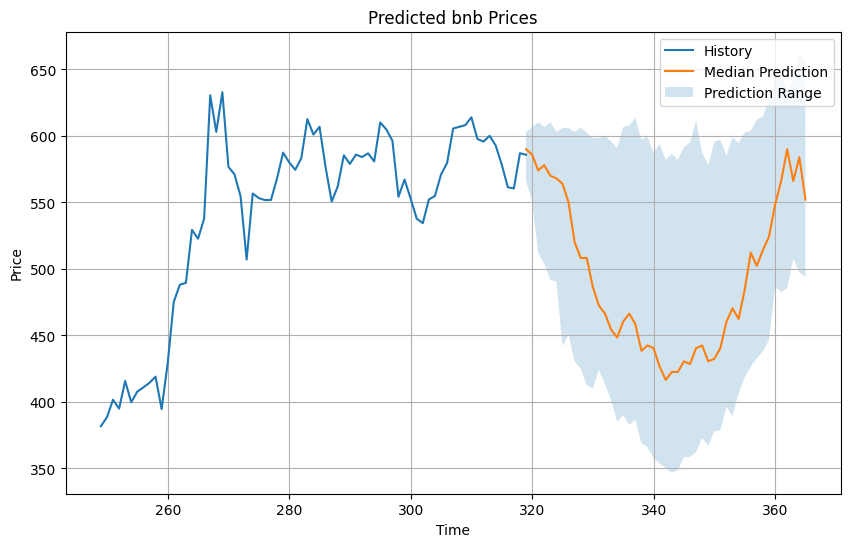

In [39]:
predicted_df = predict_and_plot_crypto_data(prediction_length=47)

So here, we have tested to predict the date range of 320 - 366
based on our historical data we know the values of the coin on the specified dates

#### For comparison

In [68]:
predicted_df['Predicted_Close']

0     589.984723
1     585.998344
2     574.039173
3     578.025585
4     570.052794
5     568.059604
6     564.073193
7     550.120865
8     520.223004
9     508.263850
10    508.263850
11    486.338763
12    472.386403
13    466.406834
14    454.447680
15    448.468095
16    460.427265
17    466.406834
18    458.434076
19    438.502147
20    442.488526
21    440.495336
22    426.543009
23    416.577044
24    422.556613
25    422.556629
26    430.529388
27    428.536198
28    440.495353
29    442.488542
30    430.529372
31    432.522578
32    440.495336
33    460.427265
34    470.393214
35    462.420439
36    484.345558
37    512.250229
38    502.284281
39    514.243419
40    524.209383
41    548.127675
42    566.066382
43    589.984723
44    566.066382
45    584.005154
46    552.114055
Name: Predicted_Close, dtype: float64

In [71]:
import pandas as pd

# Check for length mismatch
if len(bnb_rest) != len(predicted_df):
  # Option 1: Extend the shorter DataFrame (adjust as needed)
  if len(predicted_df) < len(bnb_rest):
    predicted_df = predicted_df.pad(len(bnb_rest))  # Pad with last value
  else:
    predicted_df = predicted_df.iloc[:len(bnb_rest)]  # Truncate if longer

# Check for index mismatch
if not bnb_rest.index.equals(predicted_df.index):
  predicted_df = predicted_df.set_index(bnb_rest.index)  # Set matching index

# Now you can safely assign the values
bnb_rest['Predicted_Close'] = predicted_df['Predicted_Close']

print(bnb_rest)  # This should show 'bnb_rest' with the added 'Predicted_Close' column


          Date        Open        High         Low       Close   Adj Close  \
320 2024-05-05  585.846558  594.995300  580.246277  592.140381  592.140381   
321 2024-05-06  592.139893  601.886719  583.373413  588.475952  588.475952   
322 2024-05-07  588.475952  599.935486  576.724548  577.486206  577.486206   
323 2024-05-08  577.486206  589.572571  575.148010  588.197449  588.197449   
324 2024-05-09  588.197449  602.589722  586.730347  596.031982  596.031982   
325 2024-05-10  596.027649  596.583374  582.045776  585.622192  585.622192   
326 2024-05-11  585.622192  594.206543  581.896667  592.027893  592.027893   
327 2024-05-12  592.029175  599.184143  587.804321  594.424561  594.424561   
328 2024-05-13  594.424561  597.768005  585.520752  591.606934  591.606934   
329 2024-05-14  591.606934  592.836975  563.420227  566.707031  566.707031   
330 2024-05-15  566.707031  587.421509  561.127258  582.074341  582.074341   
331 2024-05-16  582.100159  586.436340  565.762329  569.190247  

In [69]:
#bnb_test = bnb[249:320]

#bnb_rest.drop(['Volume', 'Predicted_Close'], axis=1, inplace=True)

bnb_rest['Predicted_Close'] = predicted_df['Predicted_Close']
bnb_rest['Predicted_Close']

In [75]:
#bnb_rest.drop(['Volume'], axis=1, inplace=True)
bnb_rest[['Close', 'Adj Close', 'Predicted_Close']]

,Close,Adj Close,Predicted_Close
320,592.140381,592.140381,589.984723
321,588.475952,588.475952,585.998344
322,577.486206,577.486206,574.039173
323,588.197449,588.197449,578.025585
324,596.031982,596.031982,570.052794
325,585.622192,585.622192,568.059604
326,592.027893,592.027893,564.073193
327,594.424561,594.424561,550.120865
328,591.606934,591.606934,520.223004
329,566.707031,566.707031,508.263850


As we can see here, the results of the predicted values are different from the actual values of the historical data we have.

We can clearly see the difference from the graphs.

The first graph is the overall 366 date graph from date range('2023-06-20', '2024-06-20')

And the below graph is teh specific date 320 - 366

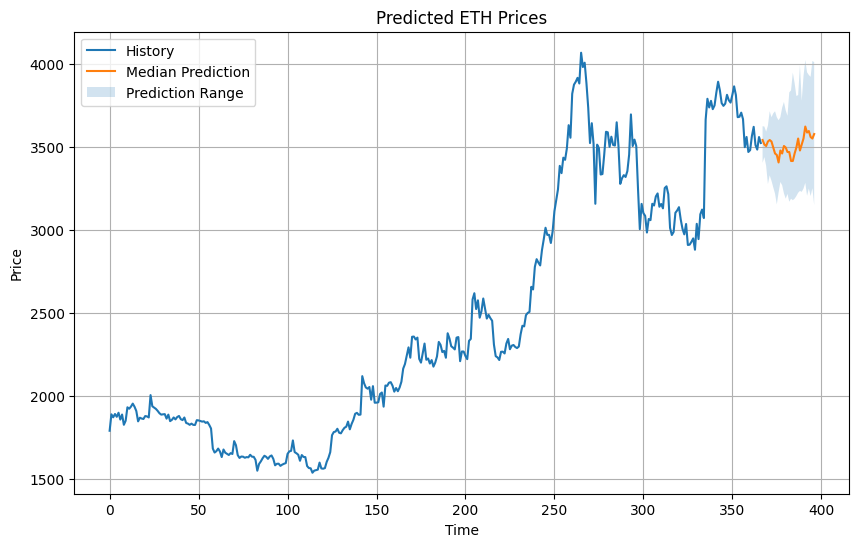

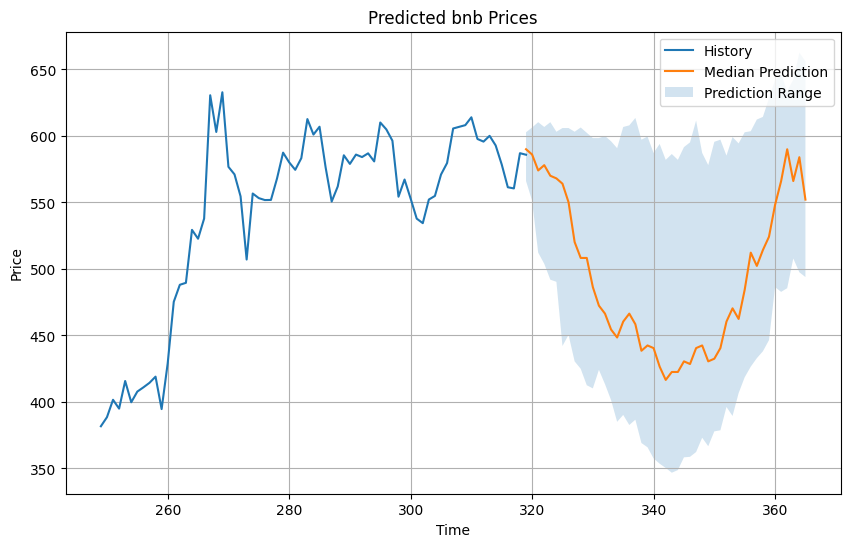

## Adding strategies

In [ ]:
import ccxt
import pandas as pd
import numpy as np
from datetime import datetime
from sqlalchemy import create_engine
import backtrader as bt
import os
import json
import ta
import pyfolio as pf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import torch
from chronos import ChronosPipeline
import matplotlib.pyplot as plt


# RDS connection information
rds_host = os.getenv('PG_HOST')
rds_port = os.getenv('PG_PORT')
rds_db = os.getenv('PG_DATABASE')
rds_user = os.getenv('PG_USER')
rds_password = os.getenv('PG_PASSWORD')

engine = create_engine(f'postgresql+psycopg2://{rds_user}:{rds_password}@{rds_host}:{rds_port}/{rds_db}')


def fetch_ohlcv(symbol, since):
    try:
        ticker = yf.Ticker(symbol)
        ohlcv = ticker.history(period='1d', start=since)
        return ohlcv.reset_index()
    except Exception as e:
        print(f"Error fetching data for {symbol}: {str(e)}")
        return None

def store_dataframe(df, table_name):
    df.to_sql(table_name, con=engine, if_exists='append', index=False)

# Fetch and store data for multiple symbols
symbols = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'XRP-USD', 'ADA-USD', 'SOL1-USD', 'DOGE-USD', 'DOT1-USD', 'SHIB-USD', 'MATIC-USD', 'LTC-USD', 'UNI-USD', 'BCH-USD', 'LINK-USD', 'XLM-USD', 'ATOM-USD', 'VET-USD', 'ICP-USD', 'FIL-USD', 'THETA-USD']
since = '2023-06-20'

for symbol in symbols:
    ohlcv = fetch_ohlcv(symbol, since)
    if ohlcv is not None and not ohlcv.empty:
        df = ohlcv.rename(columns={'Date': 'timestamp', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'})
        store_dataframe(df, f'ohlcv_{symbol.replace("-", "_")}')
        print(f'Stored data for {symbol}')
    else:
        print(f'Failed to fetch data for {symbol}')
    sleep(1)  # Add a delay to avoid hitting rate limits


def fetch_data_from_db(symbol):
    table_name = f'ohlcv_{symbol.replace("-", "_")}'
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql(query, con=engine)
    return df


def backtest_strategy_with_forecast(strategy_func, df, forecast_df):
    # Integrate forecasted data into the original dataframe
    df = pd.concat([df, forecast_df])

    # Run the strategy on the combined dataframe
    df = strategy_func(df)

    df['strategy_return'] = df['close'].pct_change() * df['signal']




### Data Fetching function

In [ ]:
def fetch_data(symbol, start_date, end_date):
    query = f"""
        SELECT timestamp AS date, open AS open, high AS high, low AS low, close AS close, volume AS volume
        FROM public."ohlcv_{symbol.replace('/', '_')}"
        WHERE timestamp >= '{start_date}' AND timestamp <= '{end_date}';
    """
    try:
        print(f"Executing query:\n{query}\n")  # Print the SQL query for debugging purposes

        data = pd.read_sql(query, con=engine)
        print(f"Fetched data:\n{data.head()}\n")  # Print the first few rows of fetched data for debugging

        # Check if data is empty
        if data.empty:
            raise ValueError("No data returned from query.")

        # Convert 'date' column to datetime
        data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

        # Set 'date' column as index
        data.set_index('date', inplace=True)

        # Ensure column names are correctly capitalized for Backtrader
        data.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)

        return data
    except Exception as e:
        print(f"Error fetching data: {e}")
        raise


### Fetching from binance



In [ ]:

# Initialize Binance API
binance = ccxt.binance()

def fetch_ohlcv(symbol, timeframe, since=None, limit=1000):
    ohlcv = binance.fetch_ohlcv(symbol, timeframe, since=since, limit=limit)
    return ohlcv

def ohlcv_to_dataframe(ohlcv):
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

def fetch_and_store_data(symbol, timeframe, since, until):
    since_timestamp = binance.parse8601(since)
    until_timestamp = binance.parse8601(until)
    all_ohlcv = []

    while since_timestamp < until_timestamp:
        ohlcv = fetch_ohlcv(symbol, timeframe, since=since_timestamp)
        all_ohlcv.extend(ohlcv)
        since_timestamp = ohlcv[-1][0]

    return ohlcv_to_dataframe(all_ohlcv)

### LSTM Model

In [86]:
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , LSTM



In [78]:
crypto_data_dict = {
    'BTC': "/content/drive/MyDrive/backtesting/datas/yfinance/BTC-USD.csv",
    'BNB': "/content/drive/MyDrive/backtesting/datas/yfinance/BNB-USD.csv",
    'ETH': "/content/drive/MyDrive/backtesting/datas/yfinance/ETH-USD.csv"
}
btc = pd.read_csv('/content/drive/MyDrive/backtesting/datas/yfinance/BTC-USD.csv')

In [79]:
# Example of LSTM Strategy
def lstm_strategy(df, look_back=60):
    data = btc['close'].values
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data.reshape(-1, 1))

    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)

    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=1, batch_size=1, verbose=2)

    predictions = model.predict(X)
    predictions = scaler.inverse_transform(predictions)

In [81]:
btc["Close"]=pd.to_numeric(btc.Close,errors='coerce')

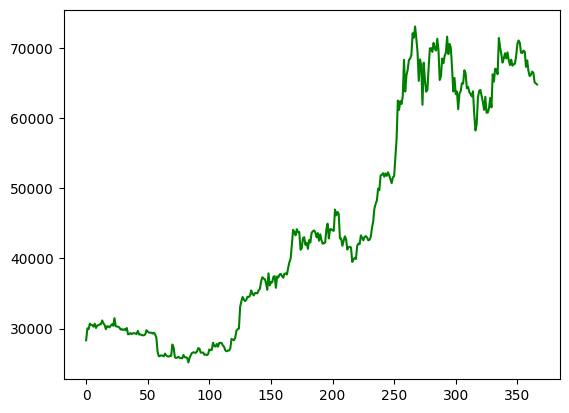

In [82]:
# 'Close' feature
plt.plot(btc.index, btc['Close'], color = 'green', label = 'Close')
plt.show()


#### preprocessing

In [84]:
# saving 'Close' feature in a variable name dataV1, since we only need that
dataV1 = btc.iloc[:,3:4]
dataV1 = dataV1.values
dataV1.shape


(367, 1)

In [87]:
# normalizing the data
Scaler = MinMaxScaler(feature_range=(0,1))
dataV1 = Scaler.fit_transform(dataV1)
dataV1.shape


(367, 1)

In [88]:
# declaring feature length
feature_length = 100
# Function to create x and y data
def Create_Features_and_Targets(data, feature_length):
  X = list()
  Y = list()
  for i in range(len(data) - feature_length -1):
    X.append(data[i:(i + feature_length), 0])
    Y.append(data[i + feature_length, 0])
  X = np.array(X)
  Y = np.array(Y)
  return X,Y


In [89]:
X_train, y_train = Create_Features_and_Targets(dataV1, feature_length)


In [90]:
X_train, y_train = Create_Features_and_Targets(dataV1, feature_length)

# Making data 3 dimensional
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))


In [91]:
X_train.shape, y_train.shape

((266, 100, 1), (266,))

#### LSTM Model

In [92]:
# model
model = Sequential([
    LSTM(100, return_sequences = True, input_shape =(X_train.shape[1],1)),
    Dropout(0.3),

    LSTM(100, return_sequences = False),
    Dropout(0.3),
    Dense(1),
])
model.compile(optimizer='adam',loss="mean_squared_error")

In [93]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 100, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121301 (473.83 KB)
Trainable params: 121301 (473.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:

#LSTM Training the model
history = model.fit(
    X_train,
    y_train,
    epochs = 50,
    batch_size = 12,
    verbose=1,
)



Epoch 1/50
23/23 [==============================] - 12s 110ms/step - loss: 0.0672
Epoch 2/50
23/23 [==============================] - 2s 91ms/step - loss: 0.0117
Epoch 3/50
23/23 [==============================] - 3s 110ms/step - loss: 0.0082
Epoch 4/50
23/23 [==============================] - 3s 147ms/step - loss: 0.0065
Epoch 5/50
23/23 [==============================] - 2s 90ms/step - loss: 0.0071
Epoch 6/50
23/23 [==============================] - 3s 111ms/step - loss: 0.0091
Epoch 7/50
23/23 [==============================] - 3s 146ms/step - loss: 0.0067
Epoch 8/50
23/23 [==============================] - 4s 167ms/step - loss: 0.0061
Epoch 9/50
23/23 [==============================] - 4s 189ms/step - loss: 0.0064
Epoch 10/50
23/23 [==============================] - 3s 142ms/step - loss: 0.0063
Epoch 11/50
23/23 [==============================] - 4s 173ms/step - loss: 0.0052
Epoch 12/50
23/23 [==============================] - 4s 180ms/step - loss: 0.0060
Epoch 13/50
23/23 [=======

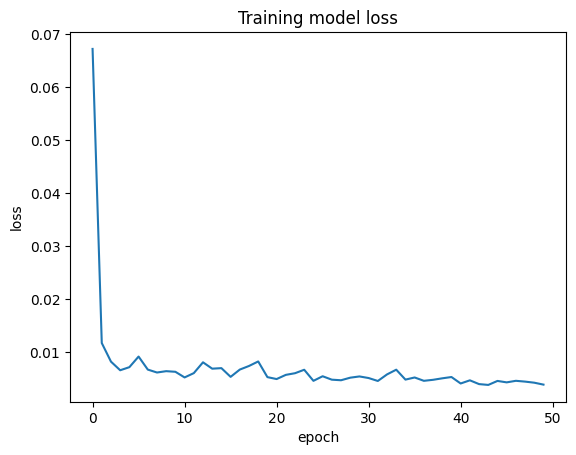

In [95]:
# training model
plt.plot(history.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [97]:
testData = btc.iloc[:,3:4]
y_real = testData.iloc[feature_length+1:,0:].values
x_test = testData.iloc[:,0:].values
y_real.shape, x_test.shape

((266, 1), (367, 1))

In [98]:
# normalize
x_test = Scaler.transform(x_test)
x_test.shape


(367, 1)

In [99]:

x_test, y_test = Create_Features_and_Targets(x_test, feature_length)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(266, 100, 1)

In [100]:
# making predictions
y_pred = model.predict(x_test)

9/9 [==============================] - 1s 41ms/step


In [101]:
predicted_price = Scaler.inverse_transform(y_pred)

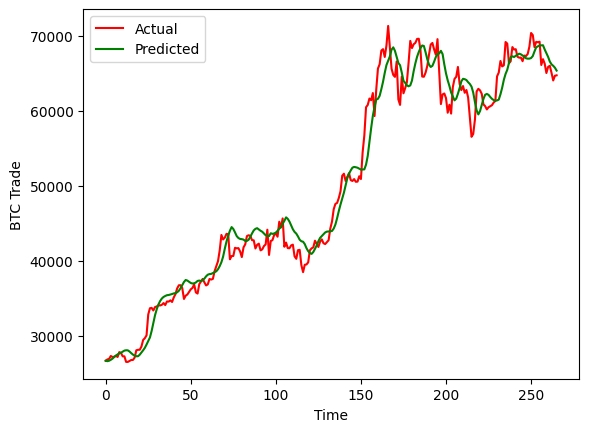

In [102]:
#Actual Stock Price and the Predicted Stock Price
plt.plot(y_real, color = 'red', label = 'Actual')
plt.plot(predicted_price, color = 'green', label = 'Predicted')

plt.xlabel('Time')
plt.ylabel('BTC Trade')
plt.legend()
plt.show()